In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import statsmodels.tsa.stattools as ts
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import math

import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [117]:
macro_data = pd.read_excel(r"/content/PROJECT DATA BACKUP.xlsx",parse_dates=True).set_index('DATE')
print(macro_data.shape) 
macro_data

(84, 2)


,EXCHANGE RATE,INTEREST RATE
DATE,,
2013-01-01,157.20,12.0
2013-02-01,158.60,12.0
2013-03-01,158.63,12.0
2013-04-01,157.90,12.0
2013-05-01,158.10,12.0
...,...,...
2019-08-01,307.00,13.5
2019-09-01,307.00,13.5
2019-10-01,307.00,13.5


In [146]:
macro_data=macro_data.resample("M").mean()
macro_data

,EXCHANGE RATE,INTEREST RATE
DATE,,
2013-01-31,157.20,12.0
2013-02-28,158.60,12.0
2013-03-31,158.63,12.0
2013-04-30,157.90,12.0
2013-05-31,158.10,12.0
...,...,...
2019-08-31,307.00,13.5
2019-09-30,307.00,13.5
2019-10-31,307.00,13.5


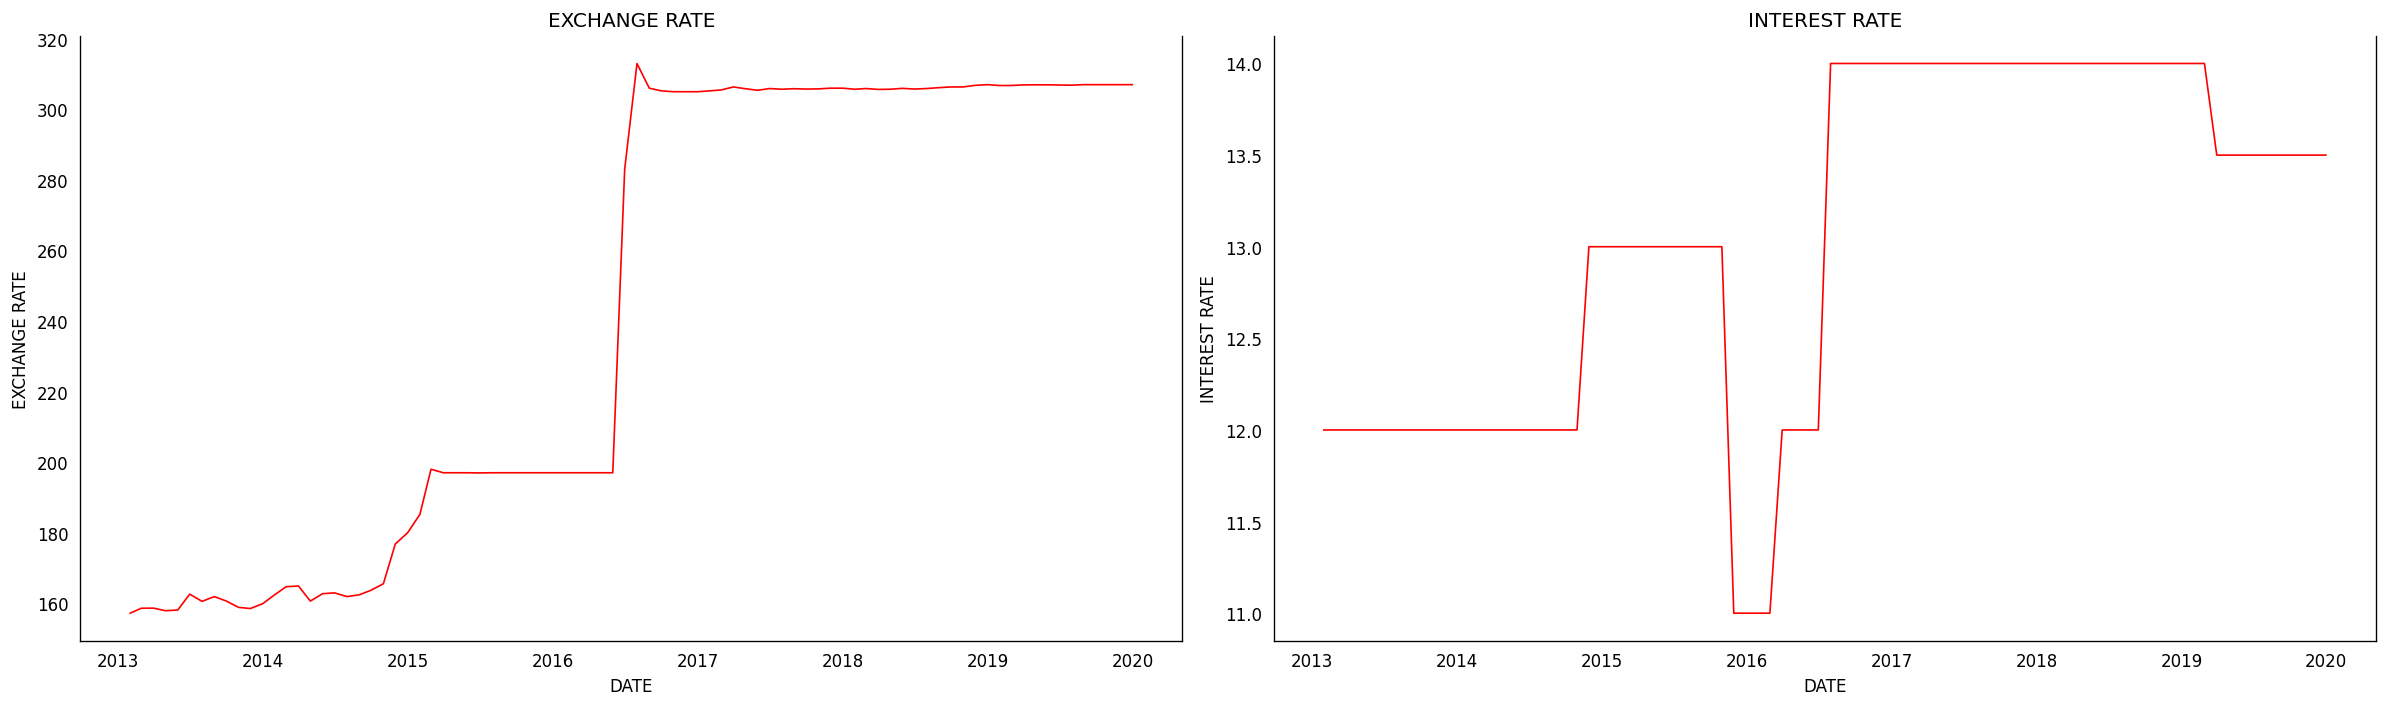

In [147]:
fig, axes = plt.subplots(nrows=1, ncols=2, dpi=120, figsize=(20,6))
for i, ax in enumerate(axes.flatten()):
    data = macro_data[macro_data.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    ax.set_title(macro_data.columns[i])
    ax.set(xlabel='DATE',ylabel=macro_data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=10)

plt.tight_layout()

In [148]:
## AUTOCORRELATION/PARTIAL AUTOCORRELATION

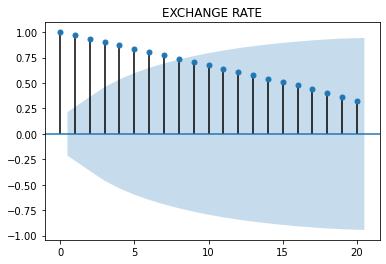

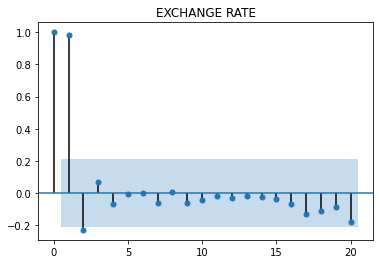

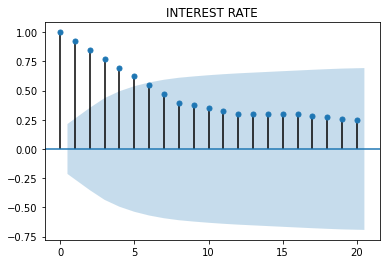

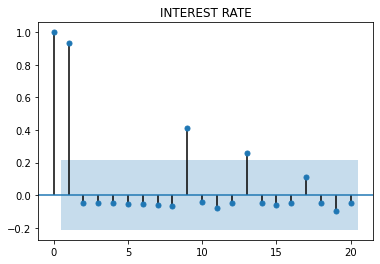

In [149]:
for i in macro_data:
    plot_acf(macro_data[i], lags=None, title= i)
    plot_pacf(macro_data[i], lags=None,title= i)
#acf(macro_data['Inter-Bank EXCHANGE RATE'])

In [150]:
### Augmented Dickey Fullers test on data

In [151]:
ad_fuller_result_1 = adfuller(macro_data['INTEREST RATE'])

print('INTEREST RATE')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')
if ad_fuller_result_1[1]<0.05:
    print('The series is stationary')
else:
    print('The series is not stationary')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(macro_data['EXCHANGE RATE'])

print('EXCHANGE RATE')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')
if ad_fuller_result_2[1]<0.05:
    print('The series is stationary')
else:
    print('The series is not stationary')

INTEREST RATE
ADF Statistic: -1.824795461327139
p-value: 0.3682227616211323
The series is not stationary

---------------------

EXCHANGE RATE
ADF Statistic: -1.0350825370668213
p-value: 0.740254725608347
The series is not stationary


In [152]:
# USING FIRST DIFFERENCING FOR STATIONARITY

In [153]:
differenced = pd.DataFrame({'EXCHANGE RATE':macro_data['EXCHANGE RATE'].diff()[1:],
                            'INTEREST RATE':macro_data['INTEREST RATE'].diff()[1:]}).dropna()
differenced

,EXCHANGE RATE,INTEREST RATE
DATE,,
2013-02-28,1.40,0.0
2013-03-31,0.03,0.0
2013-04-30,-0.73,0.0
2013-05-31,0.20,0.0
2013-06-30,4.50,0.0
...,...,...
2019-08-31,0.15,0.0
2019-09-30,0.00,0.0
2019-10-31,0.00,0.0


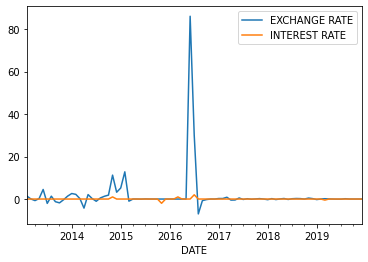

In [154]:
differenced.plot()

In [155]:
# CHECKING FOR STATIONARITY ON FIRST DIFFERENCED DATA

In [156]:
#ploting the acf and pacf to check for stationarity

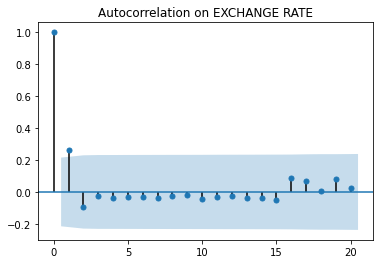

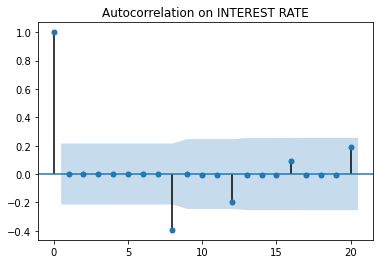

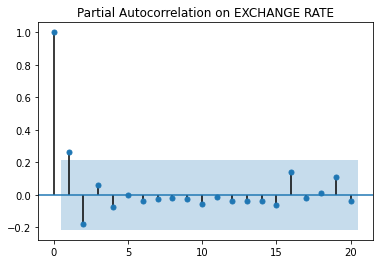

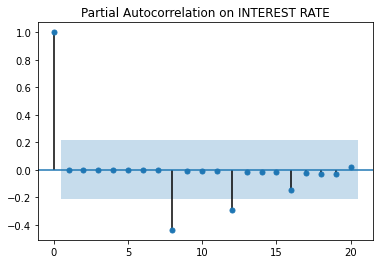

In [157]:
for i in differenced:
    plot_acf(differenced[i], lags=None, title= 'Autocorrelation on '+i)

for i in differenced:
    plot_pacf(differenced[i], lags=None,title= 'Partial Autocorrelation on '+i)


In [158]:
# confirming with augmented dickey fullers test

In [159]:
ad_fuller_result_1 = adfuller(differenced['INTEREST RATE'],maxlag=2,)
#The null hypothesis of the Augmented Dickey-Fuller is that there is a unit
#root, with the alternative that there is no unit root. If the pvalue is
#above a critical size, then we cannot reject that there is a unit root.


print('INTEREST RATE')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')
if ad_fuller_result_1[1]<0.05:
    print('The series is stationary')
else:
    print('The series is not stationary')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(differenced['EXCHANGE RATE'],maxlag=2)

print('Bank EXCHANGE RATE')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')
if ad_fuller_result_2[1]<0.05:
    print('The series is stationary')
else:
    print('The series is not stationary')

INTEREST RATE
ADF Statistic: -8.968312104826051
p-value: 7.878295526946455e-15
The series is stationary

---------------------

Bank EXCHANGE RATE
ADF Statistic: -6.395608333775858
p-value: 2.05448708350073e-08
The series is stationary


In [160]:
# GRANGER CAUSUALITY TEST 

In [161]:
print('INTEREST RATE causes EXCHANGE RATE?\n')
print('------------------')
granger_1 = grangercausalitytests(differenced[['EXCHANGE RATE', 'INTEREST RATE']], 4)

print('\EXCHANGE RATE causes INTEREST RATE?\n')
print('------------------')
granger_2 = grangercausalitytests(differenced[['INTEREST RATE', 'EXCHANGE RATE']], 4)

INTEREST RATE causes EXCHANGE RATE?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0382  , p=0.3114  , df_denom=79, df_num=1
ssr based chi2 test:   chi2=1.0776  , p=0.2992  , df=1
likelihood ratio test: chi2=1.0706  , p=0.3008  , df=1
parameter F test:         F=1.0382  , p=0.3114  , df_denom=79, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1564  , p=0.8555  , df_denom=76, df_num=2
ssr based chi2 test:   chi2=0.3334  , p=0.8465  , df=2
likelihood ratio test: chi2=0.3327  , p=0.8467  , df=2
parameter F test:         F=0.1564  , p=0.8555  , df_denom=76, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.2699  , p=0.0260  , df_denom=73, df_num=3
ssr based chi2 test:   chi2=10.7503 , p=0.0132  , df=3
likelihood ratio test: chi2=10.0869 , p=0.0178  , df=3
parameter F test:         F=3.2699  , p=0.0260  , df_denom=73, df_num=3

Granger Causality
number of lags (no zero) 

In [162]:
#### $H_0$ : The time series INTEREST RATE, does NOT Granger cause the time series Inter-Bank EXCHANGE RATE
#### $H_1$ : The time series INTEREST RATE, Granger cause the time series Inter-Bank EXCHANGE RATE

In [163]:
print('INTEREST RATE causes EXCHANGE RATE')
for i in range(1,5):    
    p_value= granger_1[i][0]['ssr_ftest'][1]
    print(f'LAG_{i}','P VALUE = ',p_value)
    if p_value<0.05:
        print('We REJECT the null hypothesis that INTEREST RATE does not Granger cause Inter-Bank EXCHANGE RATE')
    else:
        print('We ACCEPT the null hypothesis that INTEREST RATE does not Granger cause Inter-Bank EXCHANGE RATE')

    
    '''The Null hypothesis for grangercausalitytests is that the time series in
    the second column, x2, does NOT Granger cause the time series in the first
column, x1. Grange causality means that past values of x2 have a
statistically significant effect on the current value of x1, taking past
values of x1 into account as regressors. We reject the null hypothesis
that x2 does not Granger cause x1 if the pvalues are below a desired size
of the test.

The null hypothesis for all four test is that the coefficients
corresponding to past values of the second time series are zero'''

INTEREST RATE causes EXCHANGE RATE
LAG_1 P VALUE =  0.3113523235260696
We ACCEPT the null hypothesis that INTEREST RATE does not Granger cause Inter-Bank EXCHANGE RATE
LAG_2 P VALUE =  0.8554885670624046
We ACCEPT the null hypothesis that INTEREST RATE does not Granger cause Inter-Bank EXCHANGE RATE
LAG_3 P VALUE =  0.025952286242848503
We REJECT the null hypothesis that INTEREST RATE does not Granger cause Inter-Bank EXCHANGE RATE
LAG_4 P VALUE =  0.0029189086432319746
We REJECT the null hypothesis that INTEREST RATE does not Granger cause Inter-Bank EXCHANGE RATE


In [164]:
#### $H_0$ : The time series Inter-Bank EXCHANGE RATE, does NOT Granger cause the time series INTEREST RATE
#### $H_1$ : The time series Inter-Bank EXCHANGE RATE, Granger cause the time series INTEREST RATE

In [165]:
print('\nEXCHANGE RATE causes INTEREST RATE')
for i in range(1,5):    
    p_value= granger_2[i][0]['ssr_ftest'][1]
    print(f'LAG_{i}','P VALUE = ',p_value)
    if p_value<0.05:
        print('We REJECT the null hypothesis that EXCHANGE RATE does not Granger cause  INTEREST RATE')
    else:
        print('We ACCEPT the null hypothesis that EXCHANGE RATE does not Granger cause  INTEREST RATE')



EXCHANGE RATE causes INTEREST RATE
LAG_1 P VALUE =  3.7076854519562874e-09
We REJECT the null hypothesis that EXCHANGE RATE does not Granger cause  INTEREST RATE
LAG_2 P VALUE =  2.1906435921866582e-08
We REJECT the null hypothesis that EXCHANGE RATE does not Granger cause  INTEREST RATE
LAG_3 P VALUE =  1.336514190767387e-07
We REJECT the null hypothesis that EXCHANGE RATE does not Granger cause  INTEREST RATE
LAG_4 P VALUE =  4.931047109585799e-08
We REJECT the null hypothesis that EXCHANGE RATE does not Granger cause  INTEREST RATE


In [166]:
max_lags = 10
y = "EXCHANGE RATE"

In [167]:
for i in range(len(differenced.columns)-1):
  results=grangercausalitytests(differenced[[y, differenced.columns[i+1]]], max_lags,verbose=False)
  p_values=[round(results[i+1][0]["ssr_ftest"][1],4) for i in range(max_lags)]
  print("Column = {} : P_Values = {}".format(differenced.columns[i+1],p_values))

Column = INTEREST RATE : P_Values = [0.3114, 0.8555, 0.026, 0.0029, 0.0078, 0.0142, 0.0, 0.0, 0.0, 0.0]


In [168]:
df_input=differenced[["EXCHANGE RATE","INTEREST RATE"]]

In [169]:
df_input

,EXCHANGE RATE,INTEREST RATE
DATE,,
2013-02-28,1.40,0.0
2013-03-31,0.03,0.0
2013-04-30,-0.73,0.0
2013-05-31,0.20,0.0
2013-06-30,4.50,0.0
...,...,...
2019-08-31,0.15,0.0
2019-09-30,0.00,0.0
2019-10-31,0.00,0.0


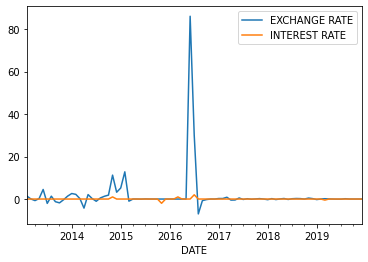

In [170]:
df_input.plot()

In [171]:
df_train = df_input[:int(0.9*(len(df_input)))]
df_test = df_input[int(0.9*(len(df_input))):]

In [172]:
df_train.shape

(74, 2)

In [173]:
df_test.shape

(9, 2)

In [174]:
model = VAR(df_train, freq="M")
#for i in range(48):
#  results = model.fit(i+1)
#  print("Order = ",i+1)
#  print("AIC = " ,results.aic)
#  print("BIC = ", results.bic)

In [175]:
model.select_order(10).summary()

,AIC,BIC,FPE,HQIC
0,3.047,3.114,21.04,3.073
1,2.690,2.893,14.74,2.770
2,2.774,3.111,16.04,2.907
3,2.760,3.232,15.82,2.946
4,2.677,3.284,14.59,2.916
5,2.708,3.450,15.10,3.000
6,2.819,3.696,16.96,3.165
7,2.352,3.364,10.70,2.751
8,1.667*,2.814*,5.439*,2.119*
9,1.736,3.018,5.889,2.241


In [176]:
model = VAR(df_train, freq="M")
results = model.fit(10)

In [177]:
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 15, Aug, 2021
Time:                     19:47:46
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    3.22924
Nobs:                     64.0000    HQIC:                   2.37061
Log likelihood:          -197.623    FPE:                    6.44222
AIC:                      1.81247    Det(Omega_mle):         3.65222
--------------------------------------------------------------------
Results for equation EXCHANGE RATE
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                     1.198725         0.911415            1.315           0.188
L1.EXCHANGE RATE          0.103112         0.151051            0.683           0.495
L1.INTEREST RATE          1.241995  

In [178]:
lag = results.k_ar

In [179]:
lag

10

In [182]:
results.forecast(df_train.values[-lag:],steps=10)

array([[ 8.63006063e-01,  1.50758849e-02],
       [ 1.00915173e+00, -2.09543459e-02],
       [-1.08992687e+00,  2.10553951e-02],
       [ 1.98726065e+00,  1.49065340e-01],
       [ 1.59708732e+00,  4.05875527e-02],
       [ 1.94665048e+00, -5.48224425e-03],
       [ 1.82006006e+01,  5.19295585e-02],
       [ 8.19459910e+00,  3.64771105e-01],
       [ 1.57169521e+00,  2.39175138e-02],
       [ 1.96662616e+00,  4.61435863e-02]])

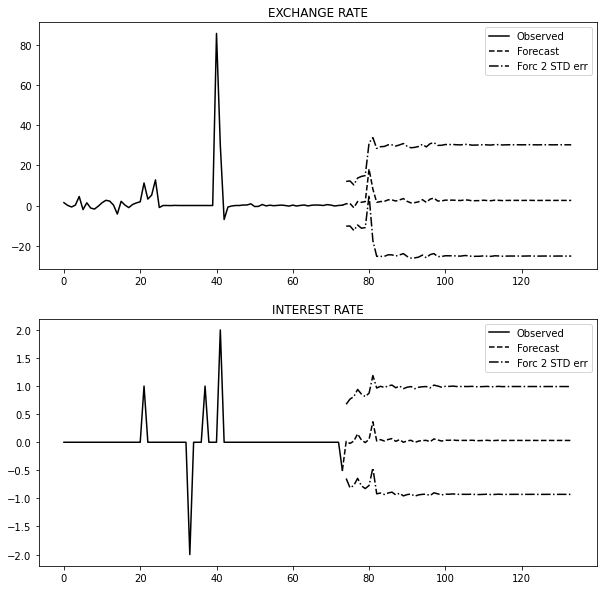

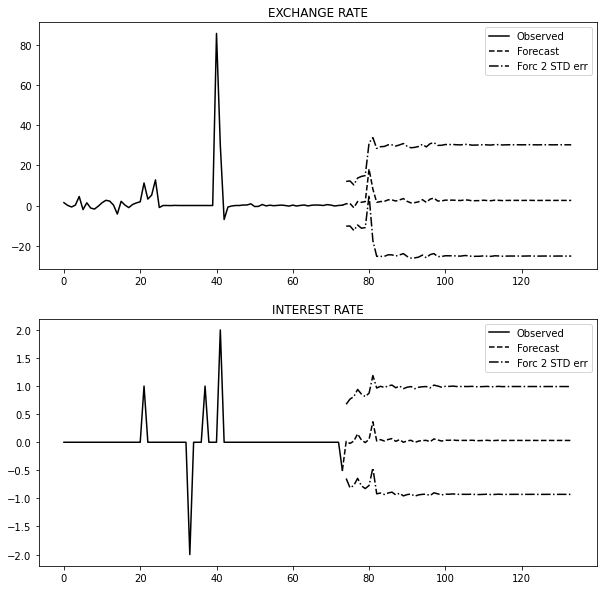

In [189]:
results.forecast(differenced.values[-lag:],60)
results.plot_forecast(60)

In [190]:
df_test[0:10]

,EXCHANGE RATE,INTEREST RATE
DATE,,
2019-04-30,0.04,0.0
2019-05-31,-0.01,0.0
2019-06-30,-0.05,0.0
2019-07-31,-0.05,0.0
2019-08-31,0.15,0.0
2019-09-30,0.00,0.0
2019-10-31,0.00,0.0
2019-11-30,0.00,0.0
2019-12-31,0.00,0.0


In [191]:
df_coeff=pd.DataFrame([results.params["EXCHANGE RATE"],results.pvalues["EXCHANGE RATE"]]).T

In [192]:
df_coeff

,EXCHANGE RATE,EXCHANGE RATE
const,1.198725,1.884306e-01
L1.EXCHANGE RATE,0.103112,4.948406e-01
L1.INTEREST RATE,1.241995,6.350500e-01
L2.EXCHANGE RATE,-0.204877,2.535426e-01
L2.INTEREST RATE,0.704135,7.836008e-01
L3.EXCHANGE RATE,-0.037983,7.620916e-01
L3.INTEREST RATE,4.494702,7.963128e-02
L4.EXCHANGE RATE,0.294897,8.329856e-03
L4.INTEREST RATE,-1.302897,6.226864e-01
L5.EXCHANGE RATE,0.054372,6.456683e-01


In [193]:
df_coeff.columns = ["coeff","pval"]

In [194]:
df_coeff.query("pval < 0.05")
np.where(df_coeff["pval"]<0.05,1,0)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [195]:
df_coeff["valid"]=np.where(df_coeff["pval"]< 0.05,1,0)

In [196]:
df_coeff

,coeff,pval,valid
const,1.198725,1.884306e-01,0
L1.EXCHANGE RATE,0.103112,4.948406e-01,0
L1.INTEREST RATE,1.241995,6.350500e-01,0
L2.EXCHANGE RATE,-0.204877,2.535426e-01,0
L2.INTEREST RATE,0.704135,7.836008e-01,0
L3.EXCHANGE RATE,-0.037983,7.620916e-01,0
L3.INTEREST RATE,4.494702,7.963128e-02,0
L4.EXCHANGE RATE,0.294897,8.329856e-03,1
L4.INTEREST RATE,-1.302897,6.226864e-01,0
L5.EXCHANGE RATE,0.054372,6.456683e-01,0


In [197]:
coeff_arr=df_coeff["coeff"][1:].values

In [198]:
coeff_arr.shape

(20,)

In [199]:
coeff_arr

array([ 1.03111719e-01,  1.24199507e+00, -2.04876884e-01,  7.04135181e-01,
       -3.79829336e-02,  4.49470221e+00,  2.94896654e-01, -1.30289726e+00,
        5.43723905e-02,  9.14616108e-01, -1.41695297e-02, -9.12661623e-01,
        9.51814680e-02, -3.36067603e+01,  7.21339852e-01, -1.06341713e+01,
       -7.09144323e-03, -1.88804248e+00,  8.67056308e-02, -3.59453210e+00])

In [200]:
df_train[-lag:]

,EXCHANGE RATE,INTEREST RATE
DATE,,
2018-06-30,-0.20,0.0
2018-07-31,0.15,0.0
2018-08-31,0.25,0.0
2018-09-30,0.20,0.0
2018-10-31,0.00,0.0
2018-11-30,0.45,0.0
2018-12-31,0.20,0.0
2019-01-31,-0.25,0.0
2019-02-28,0.02,0.0


In [205]:
in_arr=df_train[-lag:][::-1].stack().to_frame().T.values

In [206]:
in_arr.shape

(1, 20)

In [207]:
in_arr

array([[ 0.15, -0.5 ,  0.02,  0.  , -0.25,  0.  ,  0.2 ,  0.  ,  0.45,
         0.  ,  0.  ,  0.  ,  0.2 ,  0.  ,  0.25,  0.  ,  0.15,  0.  ,
        -0.2 ,  0.  ]])

In [208]:
np.dot(in_arr, coeff_arr)+df_coeff["coeff"][:].values

array([  0.86300606,  -0.23260754,   0.90627581,  -0.54059614,
         0.36841592,  -0.37370219,   4.15898295,  -0.04082261,
        -1.63861651,  -0.28134687,   0.57889685,  -0.34988879,
        -1.24838088,  -0.24053779, -33.94247951,   0.38562059,
       -10.96989059,  -0.3428107 ,  -2.22376174,  -0.24901363,
        -3.93025136])